In [54]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import altair as alt
# import missingno as msno 
from matplotlib import pyplot
import scipy.stats as st
from matplotlib.patches import Rectangle 
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [55]:
df = pd.read_csv('Soaren_Management_Lead_Bid_Test_Data.csv', sep=',')
df.head(10)

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion
0,58995330,NaN,0,-106.80,0.336
1,58995358,NaN,0,-43.12,0.219
2,58995397,NaN,0,-90.56,0.332
3,58995410,NaN,0,-82.08,0.308
4,58995635,NaN,0,94.88,0.321
5,58995654,NaN,0,19.68,0.518
6,58995685,NaN,0,-59.92,0.403
7,58995772,NaN,0,49.92,0.522
8,58995792,35.0,0,360.67,0.086
9,58995977,35.0,1,271.49,0.356


In [56]:
# msno.matrix(df)


- Chart indicates missing values contained completely in BidPrice column.

## Get a Detailed Information of the Data

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53950 entries, 0 to 53949
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  53950 non-null  int64  
 1   BidPrice            21946 non-null  float64
 2   AcceptedBid         53950 non-null  int64  
 3   ExpectedRevenue     53950 non-null  float64
 4   ExpectedConversion  53950 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.1 MB


## Verify all the unique bidding Data

In [58]:
df['BidPrice'].unique()

array([nan, 35., 75.,  3., 50.])

## Check for duplicate ids

In [59]:
ids = df['id'].tolist()
set([x for x in ids if ids.count(x) > 1])

{59826378}

In [60]:
df.loc[df['id'] == 59826378]

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion
13813,59826378,35.0,1,185.92,0.491
13814,59826378,35.0,1,185.92,0.491


## Remove Null rows and duplicate id

In [61]:
df_dropna = df.dropna()
df_dropna = df_dropna.drop(13813)
# df_dropna.head()

## Using the given function ExpectedReturn as new column

In [62]:
df_dropna['ExpectedReturn'] = df_dropna.apply(lambda row: row['ExpectedRevenue'] * row['ExpectedConversion'], axis=1)
df_dropna.head()


,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion,ExpectedReturn
8,58995792,35.0,0,360.67,0.086,31.01762
9,58995977,35.0,1,271.49,0.356,96.65044
10,58996071,35.0,1,184.64,0.319,58.90016
11,58996117,35.0,0,107.60,0.446,47.98960
12,58996178,35.0,1,82.80,0.463,38.33640


## Calculate the Total Expected Net Return (Sanity Check As given in the question )

In [63]:
def calc_expected_revenue_with_bid_price(df):
    expected_row_revenue_list = []
    for index, row in df.iterrows():
        expected_row_revenue_list.append((row["ExpectedRevenue"] * row["ExpectedConversion"]) - row["BidPrice"])
    return sum(expected_row_revenue_list)

In [64]:
total_expected_revenue = calc_expected_revenue_with_bid_price(df_accepted)
total_expected_revenue

1207597.7565699946

## Calculate the proportion of expected return for each bid price

In [65]:
svtyfv_expected_revenue = calc_expected_revenue_with_bid_price(df_accepted_75)
svtyfv_expected_revenue/total_expected_revenue

0.556336558514515

In [66]:
ftfy_expected_revenue = calc_expected_revenue_with_bid_price(df_accepted_50)
ftfy_expected_revenue/total_expected_revenue

0.04121793322254736

In [67]:
thrtyfv_expected_revenue = calc_expected_revenue_with_bid_price(df_accepted_35)
thrtyfv_expected_revenue/total_expected_revenue

0.37267368050457095

In [68]:
three_expected_revenue = calc_expected_revenue_with_bid_price(df_accepted_3)
three_expected_revenue/total_expected_revenue

0.029771827758373393

##  Bids on each leads that did not have an expected return greater than the bid cost

In [69]:
df_upside_down = pd.DataFrame(columns = ['BidPrice', 'ExpectedReturn']) 

for index, row in df_dropna.iterrows():
    if row["ExpectedReturn"] < row["BidPrice"]:
        df_upside_down.loc[index] = row

        

In [70]:
df_upside_down.head()

,BidPrice,ExpectedReturn
8,35.0,31.01762
44,35.0,33.34640
45,35.0,34.47824
110,75.0,49.27704
175,35.0,32.66616


In [71]:
print("Cost of bids:")
df_upside_down['BidPrice'].sum()

Cost of bids:


4890.0

In [72]:
print("Cost of bids:")
df_upside_down['ExpectedReturn'].sum()

Cost of bids:


3834.9838600000003

In [73]:
df_upside_down['BidPrice'].sum() - df_upside_down['ExpectedReturn'].sum()

1055.0161399999997

## Here We Compare Accepted and Rejected Bid distributions by expected revenue, expected conversion, and expected return. 

In [74]:
df_rejected = df_dropna.loc[df_dropna['AcceptedBid'] == 0]
df_rejected.head()

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion,ExpectedReturn
8,58995792,35.0,0,360.67,0.086,31.01762
11,58996117,35.0,0,107.60,0.446,47.98960
27,58997066,75.0,0,562.58,0.187,105.20246
46,58998021,35.0,0,190.40,0.238,45.31520
50,58998177,35.0,0,109.92,0.497,54.63024


In [75]:
df_rejected_75 = df_rejected.loc[df_rejected['BidPrice'] == 75.0]
# df_rejected_75.head()

In [76]:
df_rejected_50 = df_rejected.loc[df_rejected['BidPrice'] == 50.0]
# df_rejected_50.head()

In [77]:
df_rejected_35 = df_rejected.loc[df_rejected['BidPrice'] == 35.0]
# df_rejected_35.head()

In [78]:
df_rejected_3 = df_rejected.loc[df_rejected['BidPrice'] == 3.0]
# df_rejected_3.head()

In [79]:
df_accepted = df_dropna.loc[df_dropna['AcceptedBid'] == 1]
df_accepted.head()

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion,ExpectedReturn
9,58995977,35.0,1,271.49,0.356,96.65044
10,58996071,35.0,1,184.64,0.319,58.90016
12,58996178,35.0,1,82.80,0.463,38.33640
13,58996190,35.0,1,158.96,0.243,38.62728
14,58996194,75.0,1,614.01,0.158,97.01358


In [80]:
df_accepted_75 = df_accepted.loc[df_accepted['BidPrice'] == 75.0]
# df_accepted_75.head()

In [81]:
df_accepted_50 = df_accepted.loc[df_accepted['BidPrice'] == 50.0]
# df_accepted_50.head()

In [82]:
df_accepted_35 = df_accepted.loc[df_accepted['BidPrice'] == 35.0]
# df_accepted_35.head()

In [83]:
df_accepted_3 = df_accepted.loc[df_accepted['BidPrice'] == 3.0]
# df_accepted_3.head()

In [84]:
def calculate_bins(x):
    q25, q75 = np.percentile(x,[.25,.75])
    bin_width = 2*(q75 - q25)*len(x)**(-1/3)
    bins = round((x.max() - x.min())/bin_width)
    return bins

In [170]:
def plot_distributions(accepted, rejected, bidprice, x_label): 
    a_bins = calculate_bins(accepted)
    r_bins = calculate_bins(rejected)
    
    plt.figure(figsize=(26,6)) 

    plt.subplot(1, 2, 1)
    plt.hist(accepted, color='blue', bins=a_bins, alpha=.5) 

    plt.subplot(1, 2, 1)
    plt.hist(rejected, color='red', bins=r_bins, alpha=.5)

    plt.xlabel(x_label)
    plt.ylabel('Bid Count')
    plt.title(f'{x_label} Distribution at {bidprice}')
    plt.legend(['Accepted', 'Rejected'])
    plt.tight_layout()
    plt.show()

In [171]:
def run_t_test(sample_a, sample_b):
    t, p = ttest_ind(sample_a, sample_b, equal_var=False)
    return ("ttest_ind:            t = %g  p = %g" % (t, p))

In [172]:
def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = st.stats.linregress(x, y)
    return f"R-squared: {r_value**2}"

## So the viewable Expected Revenue at 75

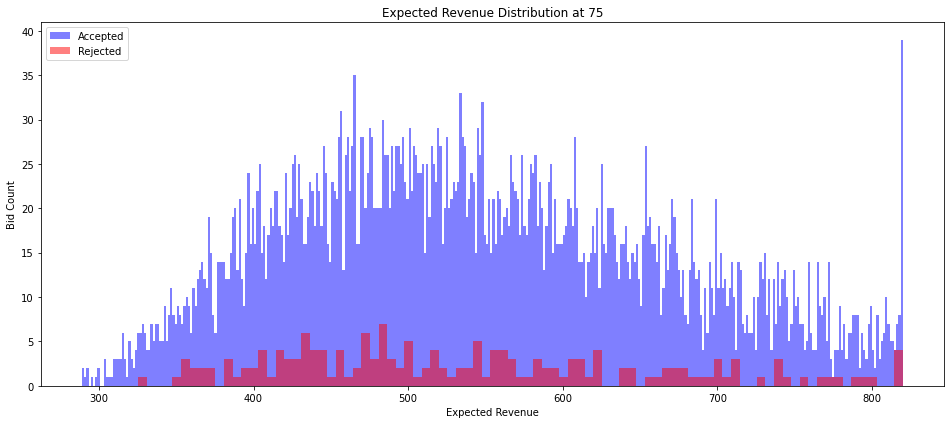

In [173]:
plot_distributions(df_accepted_75["ExpectedRevenue"], df_rejected_75["ExpectedRevenue"], 75, "Expected Revenue") 

In [174]:
run_t_test(df_accepted_75["ExpectedRevenue"], df_rejected_75["ExpectedRevenue"])

'ttest_ind:            t = 0.855004  p = 0.393673'

- P-value way aboove .05, likely true null, no significant difference between samples. 

## So the viewable Expected Revenue vs Expected Conversion at 75

<AxesSubplot:xlabel='ExpectedRevenue', ylabel='ExpectedConversion'>

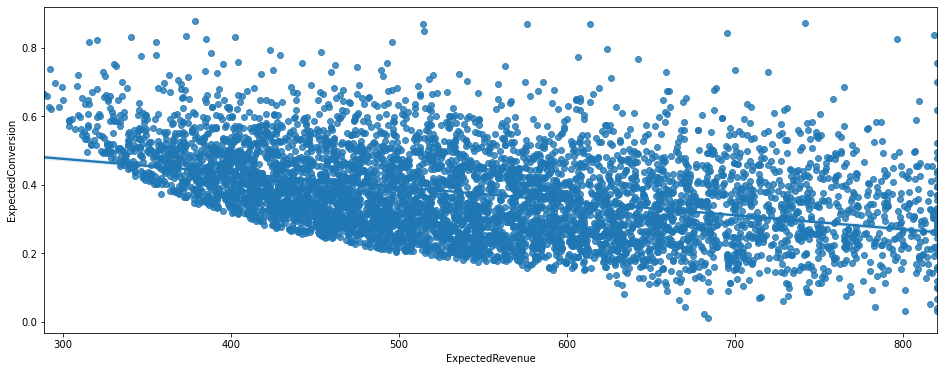

In [175]:
plt.figure(figsize=(16, 6))
sns.regplot(x="ExpectedRevenue", y="ExpectedConversion", data=df_accepted_75)

In [176]:
rsquared(df_accepted_75["ExpectedRevenue"], df_accepted_75["ExpectedConversion"])

'R-squared: 0.1519755433979806'

- No strong correlation between ER and EC on 75

## Expected Revenue at 50

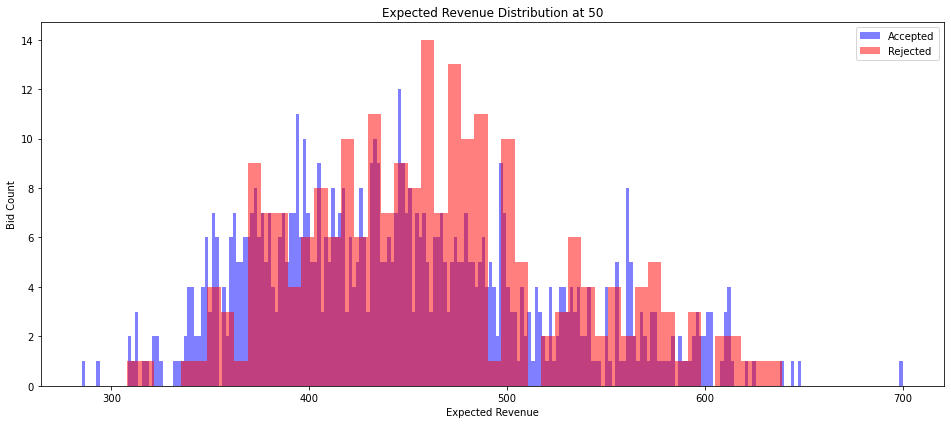

In [177]:
plot_distributions(df_accepted_50["ExpectedRevenue"], df_rejected_50["ExpectedRevenue"], 50, "Expected Revenue") 

In [178]:
run_t_test(df_accepted_50["ExpectedRevenue"], df_rejected_50["ExpectedRevenue"])

'ttest_ind:            t = -2.77068  p = 0.00584627'

- .0058 p-value shows siginificant difference between sample populations

## Expected Revenue vs Expected Conversion at 50

<AxesSubplot:xlabel='ExpectedRevenue', ylabel='ExpectedConversion'>

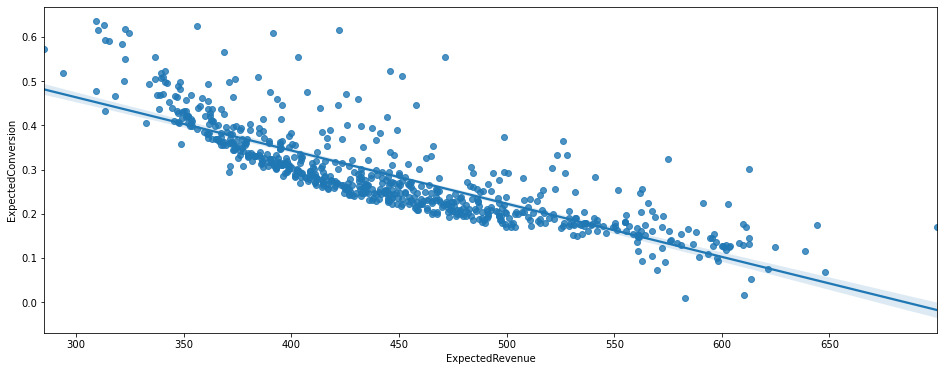

In [179]:
plt.figure(figsize=(16, 6))
sns.regplot(x="ExpectedRevenue", y="ExpectedConversion", data=df_accepted_50)

In [180]:
rsquared(df_accepted_50["ExpectedRevenue"], df_accepted_50["ExpectedConversion"])

'R-squared: 0.69360909769821'

- moderate negative correlation between ER and EC at 50

## So the viewable Expecte Revenue at 35

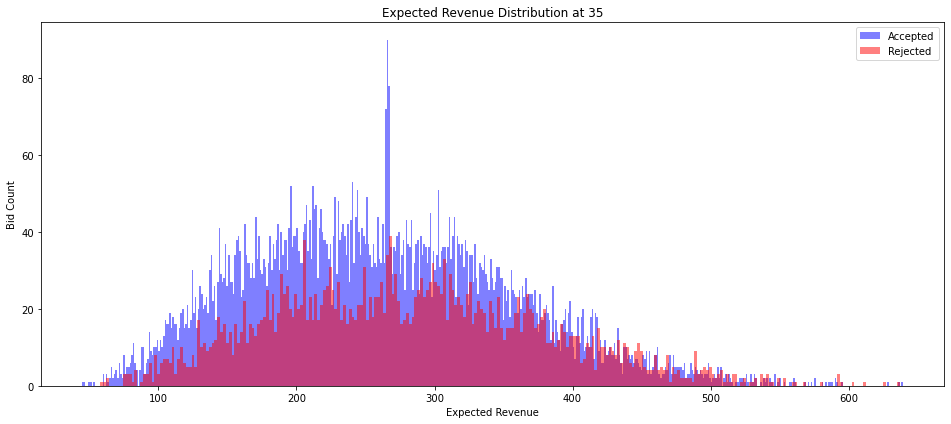

In [181]:
plot_distributions(df_accepted_35["ExpectedRevenue"], df_rejected_35["ExpectedRevenue"], 35, "Expected Revenue") 

In [182]:
run_t_test(df_accepted_35["ExpectedRevenue"], df_rejected_35["ExpectedRevenue"])

'ttest_ind:            t = -10.2001  p = 3.34558e-24'

- siginificant difference between sample populations at 35

## Expected Revenue vs Expected Converison at 35

<AxesSubplot:xlabel='ExpectedRevenue', ylabel='ExpectedConversion'>

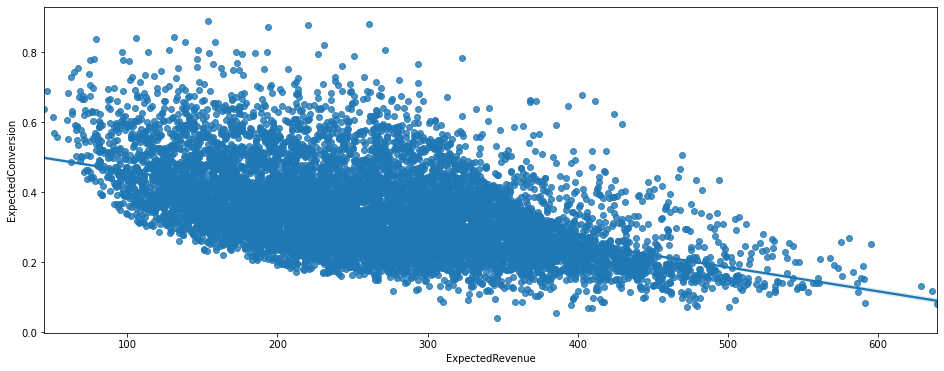

In [183]:
plt.figure(figsize=(16, 6))
sns.regplot(x="ExpectedRevenue", y="ExpectedConversion", data=df_accepted_35)

In [184]:
rsquared(df_accepted_35["ExpectedRevenue"], df_accepted_35["ExpectedConversion"])

'R-squared: 0.27301936112874725'

- no strong correlation between ER and EC at 35

## So the viewable Expected Revenue at 3

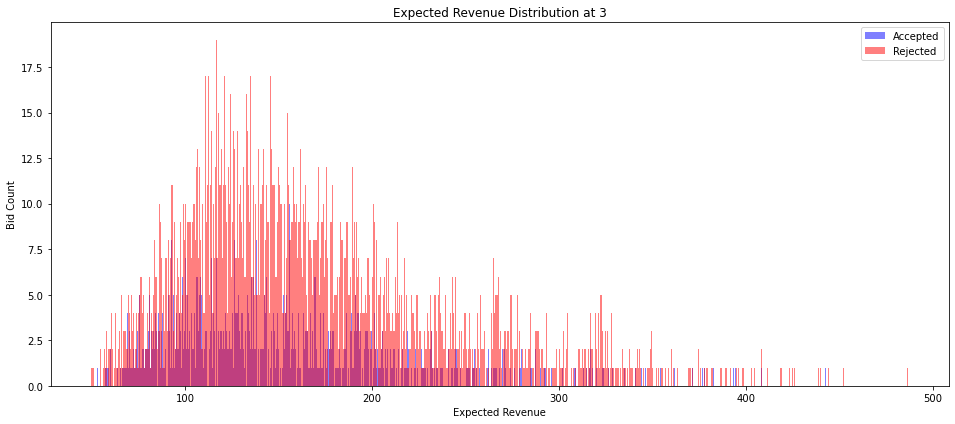

In [185]:
plot_distributions(df_accepted_3["ExpectedRevenue"], df_rejected_3["ExpectedRevenue"], 3, "Expected Revenue") 

In [186]:
run_t_test(df_accepted_3["ExpectedRevenue"], df_rejected_3["ExpectedRevenue"])

'ttest_ind:            t = -5.95708  p = 3.08861e-09'

- significant difference between sample populations at 3

## So the viewable Expected Revenue vs Expected Conversion at 3

<AxesSubplot:xlabel='ExpectedRevenue', ylabel='ExpectedConversion'>

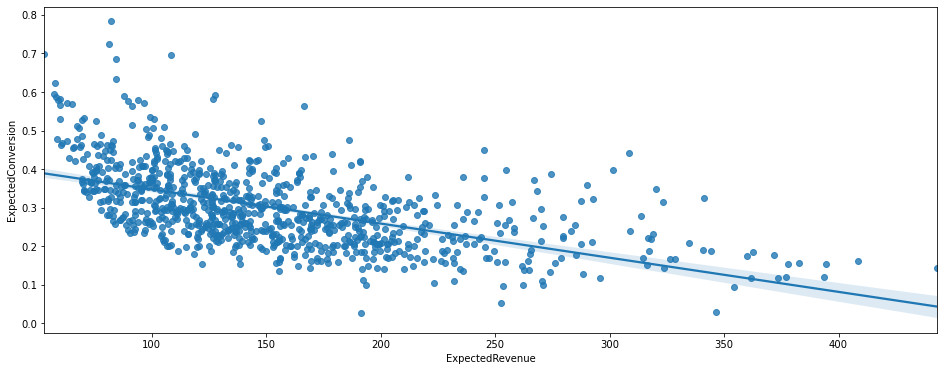

In [187]:
plt.figure(figsize=(16, 6))
sns.regplot(x="ExpectedRevenue", y="ExpectedConversion", data=df_accepted_3)

In [188]:
rsquared(df_accepted_3["ExpectedRevenue"], df_accepted_3["ExpectedConversion"])

'R-squared: 0.30797616101702674'

- no strong correlation between ER and EC at 3

## So the viewable Expected Conversion at 75

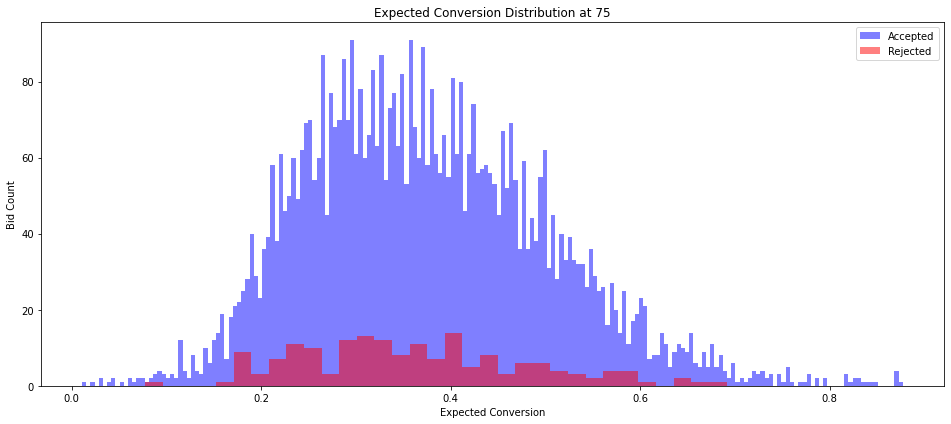

In [189]:
plot_distributions(df_accepted_75["ExpectedConversion"], df_rejected_75["ExpectedConversion"], 75, "Expected Conversion") 


In [190]:
run_t_test(df_accepted_75["ExpectedConversion"], df_rejected_75["ExpectedConversion"])

'ttest_ind:            t = 1.44652  p = 0.149737'

- no significant difference between EC sample populations at 75

## So the viewable Expected Conversion at 50

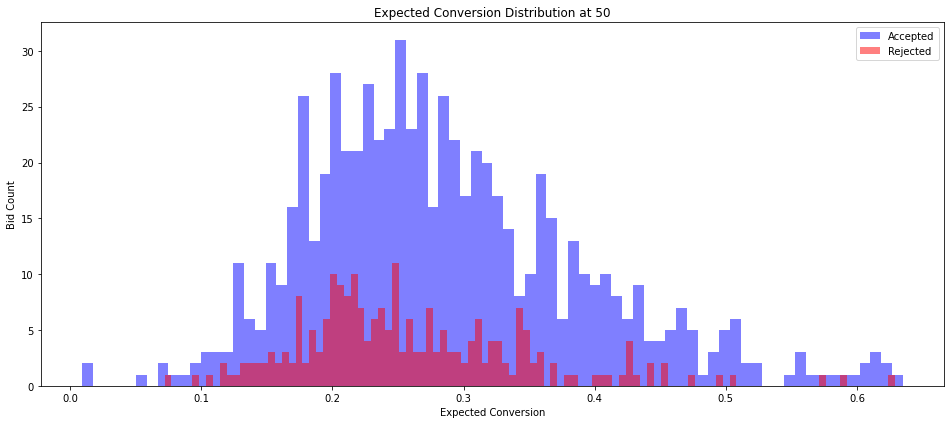

In [191]:
plot_distributions(df_accepted_50["ExpectedConversion"], df_rejected_50["ExpectedConversion"], 50, "Expected Conversion") 


In [192]:
run_t_test(df_accepted_50["ExpectedConversion"], df_rejected_50["ExpectedConversion"])

'ttest_ind:            t = 3.60463  p = 0.000347679'

- significant difference between EC sample populations at 50

## So the viewable Expected Conversion at 35

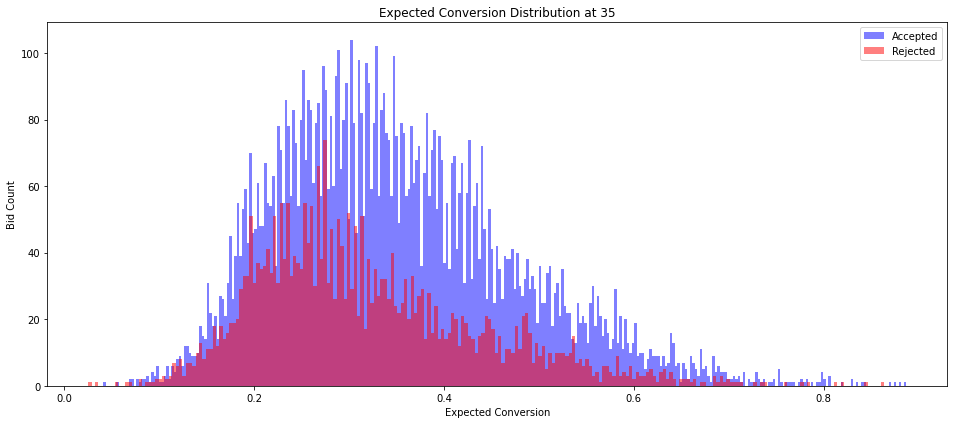

In [193]:
plot_distributions(df_accepted_35["ExpectedConversion"], df_rejected_35["ExpectedConversion"], 35, "Expected Conversion") 


In [194]:
run_t_test(df_accepted_35["ExpectedConversion"], df_rejected_35["ExpectedConversion"])

'ttest_ind:            t = 11.9258  p = 2.14415e-32'

- significant difference between EC sample populations at 35

## So the viewable Expected Conversion at 3

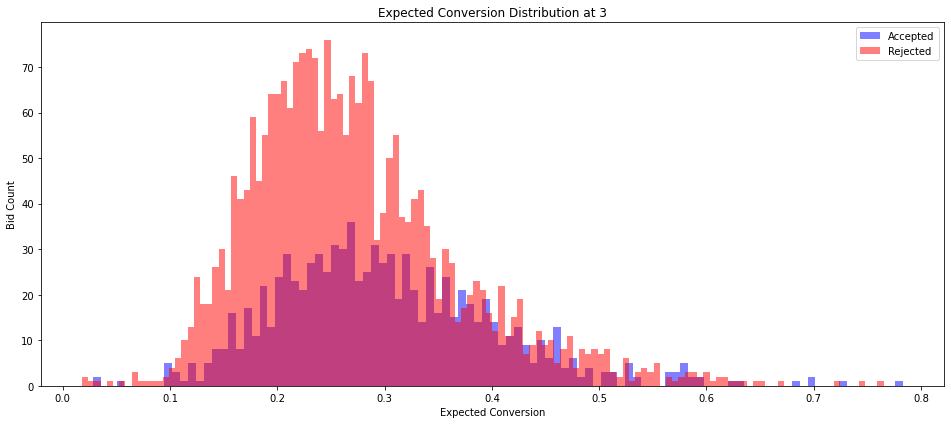

In [195]:
plot_distributions(df_accepted_3["ExpectedConversion"], df_rejected_3["ExpectedConversion"], 3, "Expected Conversion") 


In [196]:
run_t_test(df_accepted_3["ExpectedConversion"], df_rejected_3["ExpectedConversion"])

'ttest_ind:            t = 7.46748  p = 1.34891e-13'

- significant difference between EC sample populations at 3

## So the viewable Expected Return at 75 

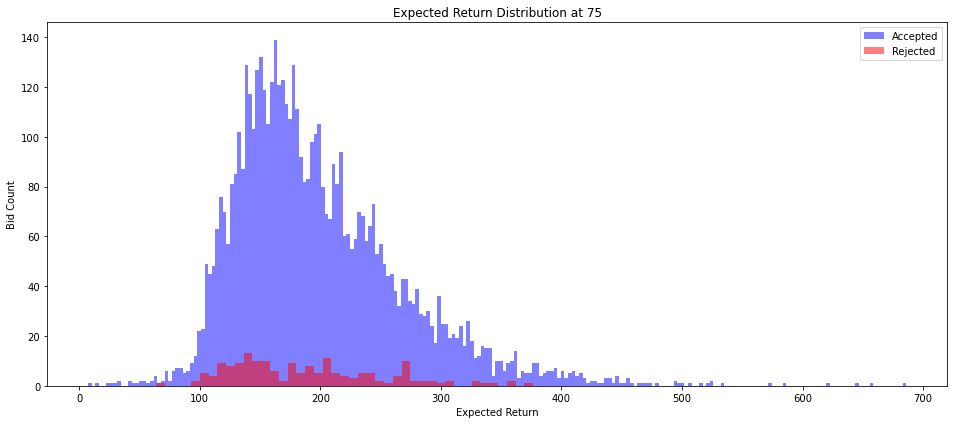

In [197]:
plot_distributions(df_accepted_75["ExpectedReturn"], df_rejected_75["ExpectedReturn"], 75, "Expected Return") 


In [198]:
run_t_test(df_accepted_75["ExpectedReturn"], df_rejected_75["ExpectedReturn"])

'ttest_ind:            t = 1.91988  p = 0.056416'

## So the viewable Expected Return at 50

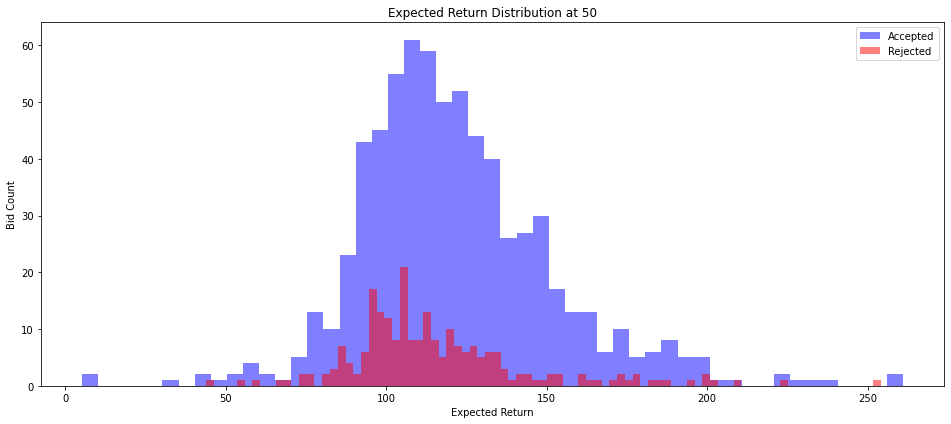

In [199]:
plot_distributions(df_accepted_50["ExpectedReturn"], df_rejected_50["ExpectedReturn"], 50, "Expected Return") 


In [200]:
run_t_test(df_accepted_50["ExpectedReturn"], df_rejected_50["ExpectedReturn"])

'ttest_ind:            t = 2.59072  p = 0.00992641'

## So the viewable Expected Return at 35 

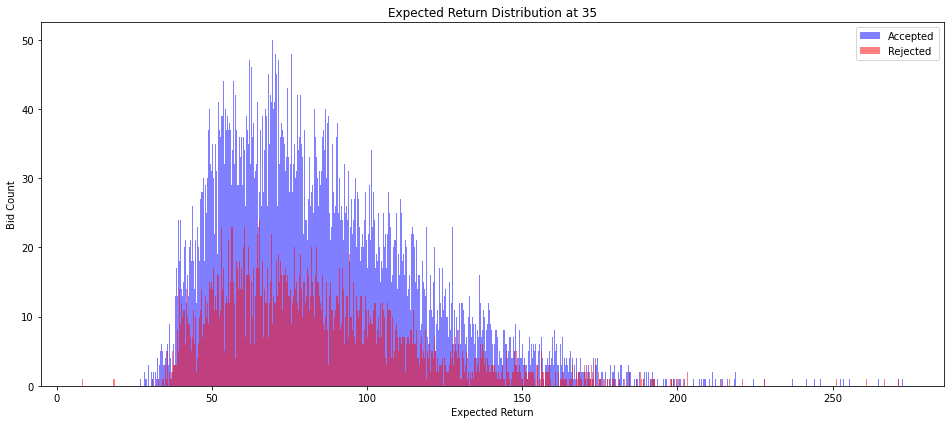

In [201]:
plot_distributions(df_accepted_35["ExpectedReturn"], df_rejected_35["ExpectedReturn"], 35, "Expected Return") 


In [202]:
run_t_test(df_accepted_35["ExpectedReturn"], df_rejected_35["ExpectedReturn"])

'ttest_ind:            t = 1.33997  p = 0.180311'

## So the viewable Expected Return at 3

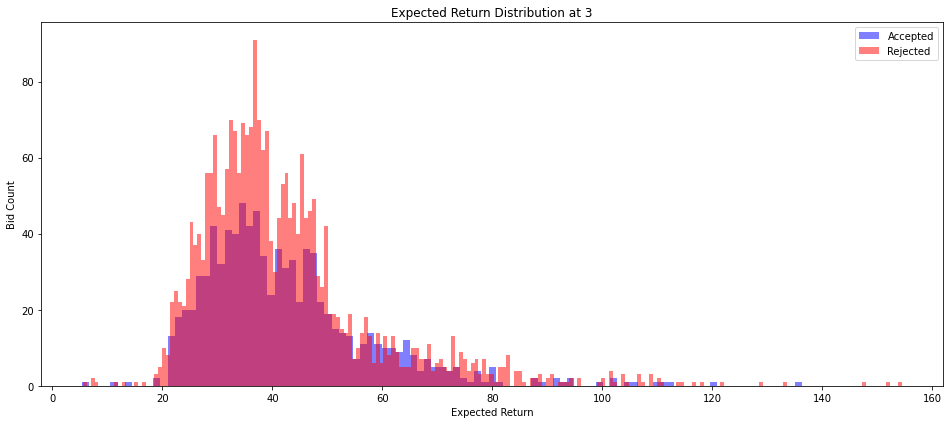

In [203]:
plot_distributions(df_accepted_3["ExpectedReturn"], df_rejected_3["ExpectedReturn"], 3, "Expected Return") 


In [204]:
run_t_test(df_accepted_3["ExpectedReturn"], df_rejected_3["ExpectedReturn"])

'ttest_ind:            t = 0.589163  p = 0.55583'

# lost bids can be converted by bidding for a profit

create a larger pool of accepted bids to compare by the proposed rules. This was achieved by calculating the average expected return for each bid grouping.
Then apply the next bid price point to the bid instance if that instance has a lower expected return than the next bid price points average expected return. 

In [205]:
df_dropna['AcceptedBid'].value_counts()

1    16025
0     5920
Name: AcceptedBid, dtype: int64

In [206]:
df_incremented_bids = df_dropna.copy()

In [207]:
def increment_bids(row, average_expected_revenue_75, average_expected_revenue_50, average_expected_revenue_35):
    if row['AcceptedBid'] == 0:
        if row['BidPrice'] == 3:
            if row['ExpectedReturn'] < average_expected_revenue_35:
                row['BidPrice'] = 35
                row['AcceptedBid'] = 1
        if row['BidPrice'] == 35:
            if row['ExpectedReturn'] < average_expected_revenue_50:
                row['BidPrice'] = 50
                row['AcceptedBid'] = 1
        if row['BidPrice'] == 50:
            if row['ExpectedReturn'] < average_expected_revenue_75:
                row['BidPrice'] = 75
                row['AcceptedBid'] = 1
    return row


In [208]:
df_incremented_bids = df_incremented_bids.apply (lambda row: increment_bids(row, 198.1419, 120.1864, 84.9197), axis=1)

In [209]:
df_incremented_bids['AcceptedBid'].value_counts()

1.0    21323
0.0      622
Name: AcceptedBid, dtype: int64

In [210]:
df_incremented_accepted = df_incremented_bids.loc[df_incremented_bids['AcceptedBid'] == 1]
df_incremented_accepted.head()

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion,ExpectedReturn
8,58995792.0,75.0,1.0,360.67,0.086,31.01762
9,58995977.0,35.0,1.0,271.49,0.356,96.65044
10,58996071.0,35.0,1.0,184.64,0.319,58.90016
11,58996117.0,75.0,1.0,107.60,0.446,47.98960
12,58996178.0,35.0,1.0,82.80,0.463,38.33640


# Find the best thresholds for each bid price

In [211]:
def calc_bids(accepted_bids, rejected_bids, starting_bid):
    bids_dict = {} 
    missed_bids = []

    for k, v in accepted_bids.items():
        bids_dict[k] = starting_bid  

        if k in rejected_bids.keys():
            if rejected_bids[k] > accepted_bids[k]:
                missed_bids.append(k)
                bids_dict[k] = bids_dict[k] + 1
                
            del rejected_bids[k]

    for k, v in rejected_bids.items():
        bids_dict[k] = starting_bid     

    return(bids_dict, missed_bids) 

In [212]:
def count_bids(df):
    df_groupby = df.groupby(by='BinExpectedRevenue', as_index=False).agg({'id': pd.Series.nunique})
    df_counts_dict = {}
    for index, row in df_groupby.iterrows():
        df_counts_dict[row['BinExpectedRevenue']] = row['id']
        
    return df_counts_dict

# Example rules

In [213]:
def run_original_rules(data):
    net_revenue_list = []
    for index, row in df_dropna.iterrows():
        if row['ExpectedRevenue'] * row['ExpectedConversion'] > 100: 
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-75)

        elif row['ExpectedRevenue'] * row['ExpectedConversion'] > 75:
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-50)

        elif row['ExpectedRevenue'] * row['ExpectedConversion'] > 50:
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-35)

        elif row['ExpectedRevenue'] * row['ExpectedConversion'] > 20: 
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-3)

        else:
            net_revenue_list.append(0)
            
    total_bids = np.count_nonzero(net_revenue_list)
    return (f"Per Bid: {round(sum(net_revenue_list)/total_bids,4)} Total: {round(sum(net_revenue_list),4)} Bid Count: {total_bids}")


# run_original_rules(df_incremented_accepted)

# No Model instead we set Rules Testable rules 

In [214]:
def run_updated_rules(data, svtyfv_threshold, ffty_threshold, thrtyfv_threshold, three_threshold):
    net_revenue_list = []
    for index, row in df_dropna.iterrows():
        
        if row['ExpectedRevenue'] * row['ExpectedConversion'] > svtyfv_threshold: 
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-75)

        elif row['ExpectedRevenue'] * row['ExpectedConversion'] > ffty_threshold:
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-50)

        elif row['ExpectedRevenue'] * row['ExpectedConversion'] > thrtyfv_threshold:
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-35)

        elif row['ExpectedRevenue'] * row['ExpectedConversion'] > three_threshold: 
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-3)

        else:
            net_revenue_list.append(0)
            
    total_bids = np.count_nonzero(net_revenue_list)
    
    return (round(sum(net_revenue_list)/total_bids,2), 
            round(sum(net_revenue_list),2), 
            total_bids)


# Find Optimum Thresholds for each bid price

## Threshold on 3

In [215]:
def tune_threshold_3(df, threshold):
    bid_prices = {}
    greatest_price = 0
    for num in range(0, threshold, 5):    
        value = run_updated_rules(df, 100, 75, 50, num)[0]
        bid_prices[num] = value
        if value > greatest_price:
            greatest_price  = value 
    return greatest_price, num, bid_prices
    

In [216]:
def plot_threshold(prices_dict):
    lists = sorted(prices_dict[2].items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    
    plt.figure(figsize=(16, 6))
    plt.xlabel('Expected Return Threshold')
    plt.ylabel('Bid Price')
    plt.title('Expected Return per bid vs Bid Price threshold')
    plt.plot(x, y)
    plt.show()

In [217]:
best_price_on_3 = tune_threshold_3(df_incremented_accepted, 100)
best_price_on_3[0]

65.02

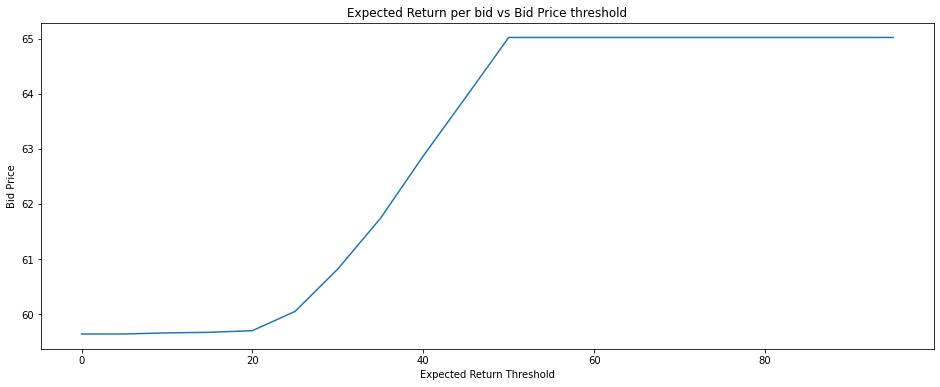

In [218]:
plot_threshold(best_price_on_3)

In [219]:
run_updated_rules(df_incremented_accepted, 100, 75, 50, 50)

(65.02, 1167319.91, 17953)

- threshold of 50 on 3 results in greatest expected net return per bid.

## Threshold on 35

In [220]:
def tune_threshold_35(df, threshold):
    bid_prices = {}
    greatest_price = 0
    for num in range(0, threshold, 5):    
        value = run_updated_rules(df, 100, 75, num, 50)[0]
        bid_prices[num] = value
        if value > greatest_price:
            greatest_price  = value 
    return greatest_price, num, bid_prices

In [221]:
best_price_on_35 = tune_threshold_35(df_incremented_accepted, 100)
best_price_on_35[0]

73.32

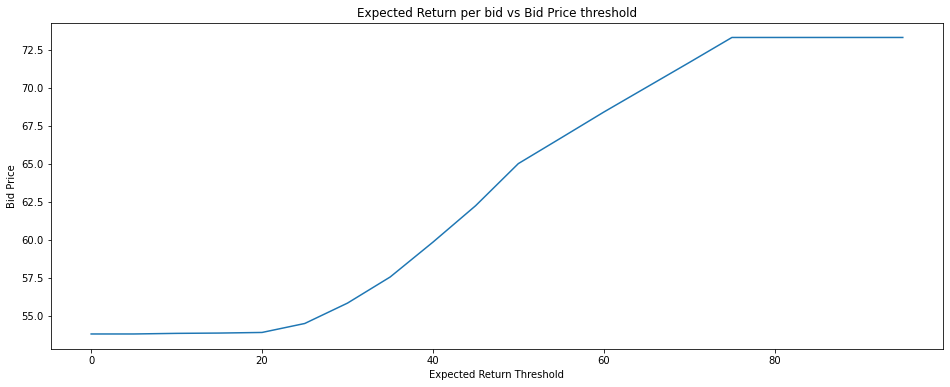

In [222]:
plot_threshold(best_price_on_35)

In [223]:
run_updated_rules(df_incremented_accepted, 100, 75, 75, 50)

(73.32, 1316343.91, 17953)

- threshold of 75 on 35 results in greatest expected net return per bid.

## Threshold on 50 

In [224]:
def tune_threshold_50(df, threshold):
    bid_prices = {}
    greatest_price = 0
    for num in range(0, threshold, 5):    
        value = run_updated_rules(df, 100, num, 75, 50)[0]
        bid_prices[num] = value
        if value > greatest_price:
            greatest_price  = value 
    return greatest_price, num, bid_prices


In [225]:
best_price_on_50 = tune_threshold_50(df_incremented_accepted,200)
best_price_on_50[0]

76.41

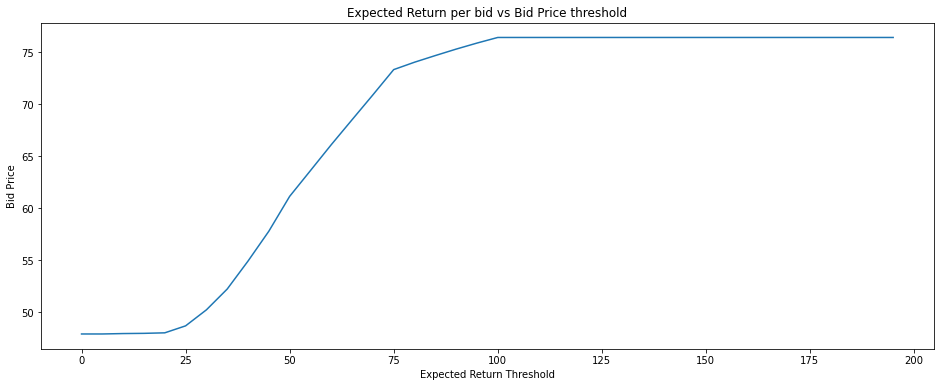

In [226]:
plot_threshold(best_price_on_50)

In [227]:
run_updated_rules(df_incremented_accepted, 100, 100, 75, 50)

(76.41, 1371753.91, 17953)

- threshold of 100 on 35 results in greatest expected net return per bid.

## Threshold on 75

In [228]:
def tune_threshold_75(df, threshold):
    bid_prices = {}
    greatest_price = 0
    for num in range(0, threshold, 5):    
        value = run_updated_rules(df, num, 100, 75, 50)[0]
        bid_prices[num] = value
        if value > greatest_price:
            greatest_price  = value 
    return greatest_price, num, bid_prices

In [229]:
best_price_on_75 = tune_threshold_75(df_incremented_accepted, 500)
best_price_on_75[0]

89.76

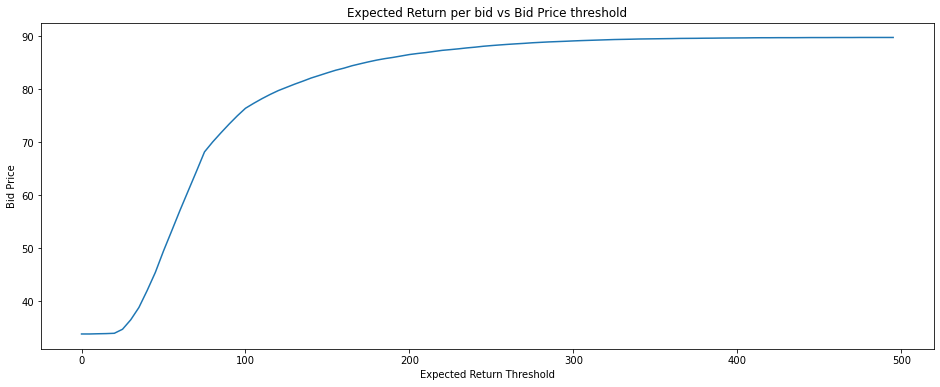

In [230]:
 plot_threshold(best_price_on_75)

In [231]:
run_updated_rules(df_incremented_accepted, 515, 100, 75, 50)

(89.77, 1611553.91, 17953)

- threshold of 515 on 75 results in greatest expected net return per bid.

## Calculate updated threshold at 3 with previous set of thresholds

In [232]:
# Carry-over thresholds 515, 100, 75, 50

In [233]:
def tune_threshold_3_second(df, threshold):
    bid_prices = {}
    greatest_price = 0
    for num in range(0, threshold, 5):    
        value = run_updated_rules(df, 515, 100, 75, num)[0]
        bid_prices[num] = value
        if value > greatest_price:
            greatest_price  = value 
    return greatest_price, num, bid_prices

In [234]:
best_price_on_3_second = tune_threshold_3_second(df_incremented_accepted, 100)
best_price_on_3_second[0]

100.4

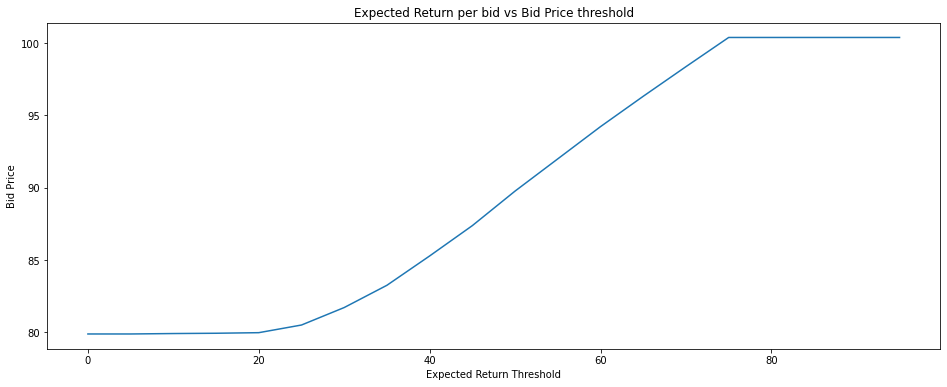

In [235]:
plot_threshold(best_price_on_3_second)

In [236]:
run_updated_rules(df_incremented_accepted, 515, 100, 75, 75)

(100.4, 1334861.6, 13296)

- 75 puts us under minimum bid amount

In [237]:
run_updated_rules(df_incremented_accepted, 515, 100, 75, 64)

(95.93, 1469401.14, 15318)

- 64 puts us just above minimum bid amount

## Calculate updated threshold at 35 with previous set of thresholds

In [238]:
def tune_threshold_35_second(df, threshold):
    bid_prices = {}
    greatest_price = 0
    for num in range(50, threshold, 5):    
        value = run_updated_rules(df, 515, 100, num, 64)[0]
        bid_prices[num] = value
        if value > greatest_price:
            greatest_price  = value 
    return greatest_price, num, bid_prices

In [239]:
best_price_on_35_second = tune_threshold_35_second(df_incremented_accepted, 200)
best_price_on_35_second[0]

103.64

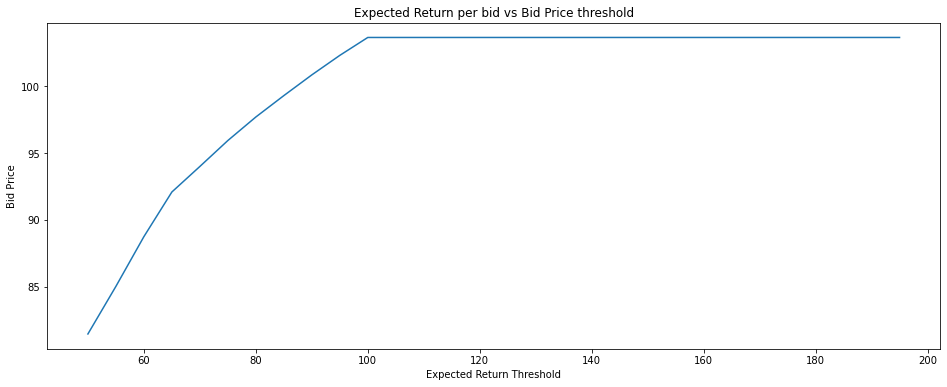

In [240]:
plot_threshold(best_price_on_35_second)

In [241]:
run_updated_rules(df_incremented_accepted, 515, 100, 100, 64)

(103.64, 1587609.14, 15318)

- threshold of 100 on 35 results in greatest expected net return per bid.

## Calculate updated threshold at 50 with previous set of thresholds

In [242]:
def tune_threshold_50_second(df, threshold):
    bid_prices = {}
    greatest_price = 0
    for num in range(0, threshold, 5):    
        value = run_updated_rules(df, 515, num, 100, 64)[0]
        bid_prices[num] = value
        if value > greatest_price:
            greatest_price  = value 
    return greatest_price, num, bid_prices


In [243]:
best_price_on_50_second = tune_threshold_50_second(df_incremented_accepted,500)
best_price_on_50_second[0]

113.03

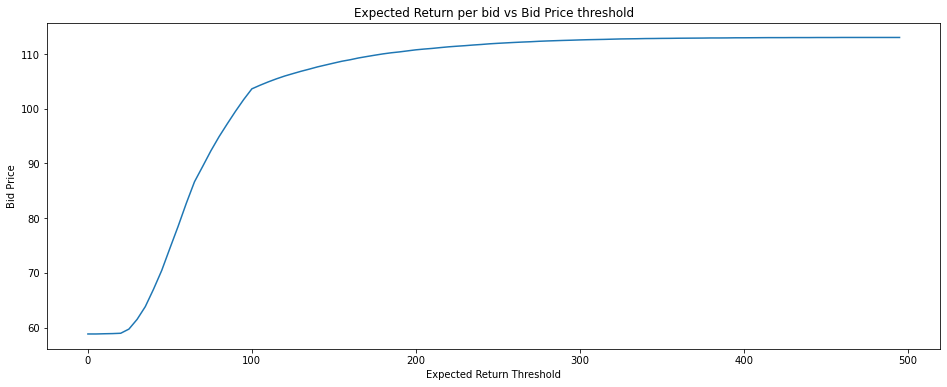

In [244]:
plot_threshold(best_price_on_50_second)

In [245]:
run_updated_rules(df_incremented_accepted, 515, 460, 100, 64)

(113.03, 1731324.14, 15318)

- threshold of 460 on 50 results in greatest expected net return per bid.

## Calculate updated threshold at 75 with previous set of thresholds

In [246]:
def tune_threshold_75_second(df, threshold):
    bid_prices = {}
    greatest_price = 0
    for num in range(500, threshold, 5):    
        value = run_updated_rules(df, num, 470, 100, 64)[0]
        bid_prices[num] = value
        if value > greatest_price:
            greatest_price  = value 
    return greatest_price, num, bid_prices

In [247]:
best_price_on_75_second = tune_threshold_75_second(df_incremented_accepted, 800)
best_price_on_75_second[0]

113.04

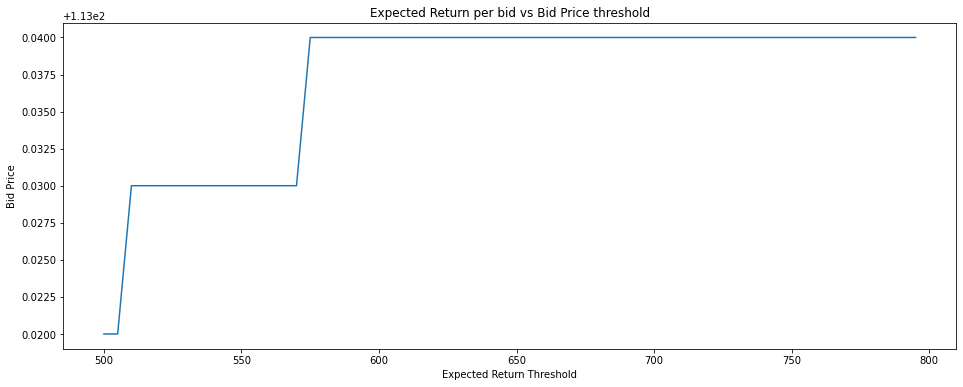

In [248]:
plot_threshold(best_price_on_75_second)

In [249]:
run_updated_rules(df_incremented_accepted, 570, 460, 100, 64) 

(113.03, 1731424.14, 15318)

- threshold of 570 on 74 results in greatest expected net return per bid.

### More tuning passes to optimize expected return per bid has resulted in an unexpected result. 
### The 35 threshold has moved up to match the 50 threshold, with no further increase in Expected Return per Bid.

In [250]:
run_updated_rules(df_incremented_accepted, 690, 650, 650, 64) 

(133.12, 2039059.14, 15318)

### Testing the removal of the $35 Bid Price

In [251]:
def run_updated_rules_second(data, svtyfv_threshold, fifty_threshold, three_threshold):
    net_revenue_list = []
    for index, row in df_dropna.iterrows():
        
        if row['ExpectedRevenue'] * row['ExpectedConversion'] > svtyfv_threshold: 
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-75)
            
        elif row['ExpectedRevenue'] * row['ExpectedConversion'] > fifty_threshold:
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-50)

        elif row['ExpectedRevenue'] * row['ExpectedConversion'] > three_threshold: 
            net_revenue_list.append(row['ExpectedRevenue'] * row['ExpectedConversion']-3)

        else:
            net_revenue_list.append(0)
            
    total_bids = np.count_nonzero(net_revenue_list)
    
    return (round(sum(net_revenue_list)/total_bids,2), 
            round(sum(net_revenue_list),2), 
            total_bids)

In [252]:
run_updated_rules_second(df_incremented_accepted, 690, 650, 64) 

(133.12, 2039059.14, 15318)

# Conclusion